In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.time import Time
import pytz
import astropy
from astropy.coordinates import SkyCoord
from astroplan import Observer, FixedTarget
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
from astroplan import time_grid_from_range
from astroplan.plots import plot_airmass

In [2]:
# Set up the location of observer
apo = Observer(longitude = -105.820278 * u.deg,
            latitude = 32.780278 * u.deg,
            elevation = 1707 * u.m,
            timezone = 'Antarctica/Davis', #http://tdc-www.harvard.edu/iraf/rvsao/bcvcorr/obsdb.html
            name = "Apache Point Observatory"
                    )
# OR apo = Observer.at_site('Apache Point Observatory')

target = FixedTarget.from_name("m31")

In [3]:
target.ra

<Longitude 10.68470833 deg>

1. The best season for observation is in Autumn, since the position of M31 on the celestial sphere corresponds to our springtime based on its RA, which means in autumn the sun is at the opposite position to the object and then we could observe the object at night.

In [4]:
#2. The length of observing time on April 16th,2019 
time1 = Time("2019-04-16")
reference_time = time1

astro_set = apo.twilight_evening_astronomical(reference_time, which='nearest')
astro_rise = apo.twilight_morning_astronomical(reference_time, which='next')

observing_length = (astro_rise - astro_set).to(u.h)

print("The length of observing time is {0:.2f} at APO on April 16th, 2019.".format(observing_length))

The length of observing time is 8.11 h at APO on April 16th, 2019.


In [5]:
#3. The moon on Dec 31st, 2019
time2 = Time("2019-12-31")
reference_time = time2

moon = get_body('moon', time2 )

moon_illum = moon_illumination(time2) * 100
moon_illum

21.625726075472407

moon phase: https://www.timeanddate.com/moon/phases/

In [6]:
print(
    """The moon would interfere with the observation somewhat on Dec 31st, 2019, 
    \nas it will be waxing from a new moon and its illumination will be {0:.1f}% of the full moon's illumination.""".format(moon_illum)
)

The moon would interfere with the observation somewhat on Dec 31st, 2019, 
    
as it will be waxing from a new moon and its illumination will be 21.6% of the full moon's illumination.


In [7]:
#4. The length of time of observing the object
reference_time = time2
astro_set2 = apo.twilight_evening_astronomical(reference_time, which='nearest')
astro_rise2 = apo.twilight_morning_astronomical(reference_time, which='next')

observing_length2 = (astro_rise2 - astro_set2).to(u.h)

print("The length of observing time is {0:.2f} at APO on Dec 31st, 2019.".format(observing_length2))

The length of observing time is 11.05 h at APO on Dec 31st, 2019.


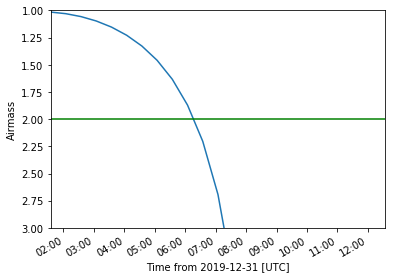

In [8]:
start_time = astro_set2
end_time = astro_rise2

observing_range = [astro_set2, astro_rise2]

time_grid = time_grid_from_range(observing_range)

plot_airmass(target, apo, time_grid)
plt.axhline(y=2, color='g');


In [9]:
print("The object can be observed clearly for 5 hours on Dec 31st, 2019.")

The object can be observed clearly for 5 hours on Dec 31st, 2019.
